<a href="https://colab.research.google.com/github/arpanastanley/Autism-ASD/blob/main/ASD_using_T_test_and_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTISM SPECTRUM DISORDER (ASD)**
A developmental disability caused by differences in the brain.


### **Symptoms:**
*difficulty with communication

*difficulty with social interactions

*obsessive interests

*repetitive behaviours


### **Treatment:**
Early recognition, as well as behavioural, educational and family therapies may reduce symptoms and support development and learning.




In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/SFARI-Gene_genes_09-02-2021release_12-11-2021export.csv')
df

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...,...,...
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3


# **BASIC PREPROCESSING**

In [ ]:
df.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


In [ ]:
df.tail(9)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
1014,9,WWP1,WW domain containing E3 ubiquitin protein liga...,ENSG00000123124,8,Rare Single Gene Mutation,3.0,0,2
1015,9,XRCC6,X-ray repair cross complementing 6,ENSG00000196419,22,Rare Single Gene Mutation,3.0,0,2
1016,9,YWHAG,tyrosine 3-monooxygenase/tryptophan 5-monooxyg...,ENSG00000170027,7,"Rare Single Gene Mutation, Syndromic",3.0,1,7
1017,9,ZMIZ1,zinc finger MIZ-type containing 1,ENSG00000108175,10,"Rare Single Gene Mutation, Syndromic",2.0,1,4
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3
1022,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4


In [ ]:
df.shape

(1023, 9)

In [ ]:
df.describe()

,status,gene-score,syndromic,number-of-reports
count,1023.0,942.000000,1023.000000,1023.000000
mean,9.0,2.326964,0.224829,8.608993
std,0.0,0.812558,0.417674,10.931901
min,9.0,1.000000,0.000000,1.000000
25%,9.0,2.000000,0.000000,3.000000
50%,9.0,3.000000,0.000000,5.000000
75%,9.0,3.000000,0.000000,9.000000
max,9.0,3.000000,1.000000,94.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             1023 non-null   int64  
 1   gene-symbol        1023 non-null   object 
 2   gene-name          1022 non-null   object 
 3   ensembl-id         1010 non-null   object 
 4   chromosome         1023 non-null   object 
 5   genetic-category   1021 non-null   object 
 6   gene-score         942 non-null    float64
 7   syndromic          1023 non-null   int64  
 8   number-of-reports  1023 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 72.1+ KB


In [ ]:
#checking for missing values
df.isna().sum()

status                0
gene-symbol           0
gene-name             1
ensembl-id           13
chromosome            0
genetic-category      2
gene-score           81
syndromic             0
number-of-reports     0
dtype: int64

In [ ]:
#Dropping off two features 
#The feature 'gene-symbol' is dropped as 'gene-name' abbreviates 'gene-symbol'
#The feature 'ensembl-id' is dropped as 'gene-name' represents 'ensembl-id'
data=df.drop(columns=['gene-symbol','ensembl-id'])
data

,status,gene-name,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,4-aminobutyrate aminotransferase,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,"ATP-binding cassette, sub-family A (ABC1), mem...",17,Rare Single Gene Mutation,3.0,0,1
2,9,ATP binding cassette subfamily A member 13,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,"ATP-binding cassette, sub-family A (ABC1), mem...",19,Rare Single Gene Mutation,3.0,0,4
4,9,angiotensin I converting enzyme,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...
1018,9,zinc finger MYM-type containing 2,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,zinc finger MYND-type containing 8,20,Rare Single Gene Mutation,1.0,0,4
1020,9,Zinc finger protein 827,4,Genetic Association,3.0,0,1
1021,9,zinc finger SWIM-type containing 6,5,"Syndromic, Genetic Association",NaN,1,3


In [ ]:
data=data.assign(syndromic=data.pop('syndromic'))
data

,status,gene-name,chromosome,genetic-category,gene-score,number-of-reports,syndromic
0,9,4-aminobutyrate aminotransferase,16,"Rare Single Gene Mutation, Genetic Association",3.0,5,0
1,9,"ATP-binding cassette, sub-family A (ABC1), mem...",17,Rare Single Gene Mutation,3.0,1,0
2,9,ATP binding cassette subfamily A member 13,7,"Rare Single Gene Mutation, Functional",3.0,6,0
3,9,"ATP-binding cassette, sub-family A (ABC1), mem...",19,Rare Single Gene Mutation,3.0,4,0
4,9,angiotensin I converting enzyme,17,"Rare Single Gene Mutation, Genetic Association",3.0,3,0
...,...,...,...,...,...,...,...
1018,9,zinc finger MYM-type containing 2,13,"Rare Single Gene Mutation, Syndromic",2.0,6,1
1019,9,zinc finger MYND-type containing 8,20,Rare Single Gene Mutation,1.0,4,0
1020,9,Zinc finger protein 827,4,Genetic Association,3.0,1,0
1021,9,zinc finger SWIM-type containing 6,5,"Syndromic, Genetic Association",NaN,3,1


In [ ]:
#checking for missing values
data.isna().sum()

status                0
gene-name             1
chromosome            0
genetic-category      2
gene-score           81
number-of-reports     0
syndromic             0
dtype: int64

# **HANDLING MISSING VALUES**

In [ ]:
#Handling the missing values in the feature 'gene-score'
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['gene-score']=imputer.fit_transform(data[['gene-score']])

In [ ]:
#checking for missing values
data.isna().sum()

status               0
gene-name            1
chromosome           0
genetic-category     2
gene-score           0
number-of-reports    0
syndromic            0
dtype: int64

In [ ]:
#dropping off the missing values
df1=data.dropna()

In [ ]:
#checking for duplicate values
df1.duplicated().sum()

0

In [ ]:
#checking for missing values
df1.isna().sum()

status               0
gene-name            0
chromosome           0
genetic-category     0
gene-score           0
number-of-reports    0
syndromic            0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1022
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             1020 non-null   int64  
 1   gene-name          1020 non-null   object 
 2   chromosome         1020 non-null   object 
 3   genetic-category   1020 non-null   object 
 4   gene-score         1020 non-null   float64
 5   number-of-reports  1020 non-null   int64  
 6   syndromic          1020 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 63.8+ KB


In [ ]:
#Checking for unique values in each features
df1.nunique()

status                  1
gene-name            1020
chromosome             25
genetic-category       14
gene-score              3
number-of-reports      57
syndromic               2
dtype: int64

In [ ]:
df1.shape

(1020, 7)

In [ ]:
df1['chromosome'].unique()

array(['16', '17', '7', '19', '3', '20', '2', '10', '1', '22', 'X', '12',
       '6', '15', '4', '8', '11', '9', '14', 'X,Y', '18', '5', '13', '21',
       'Y'], dtype=object)

In [ ]:
df1.corr()

<ipython-input-62-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,status,gene-score,number-of-reports,syndromic
status,NaN,NaN,NaN,NaN
gene-score,NaN,1.000000,-0.455710,-0.175911
number-of-reports,NaN,-0.455710,1.000000,0.297523
syndromic,NaN,-0.175911,0.297523,1.000000


<Axes: >

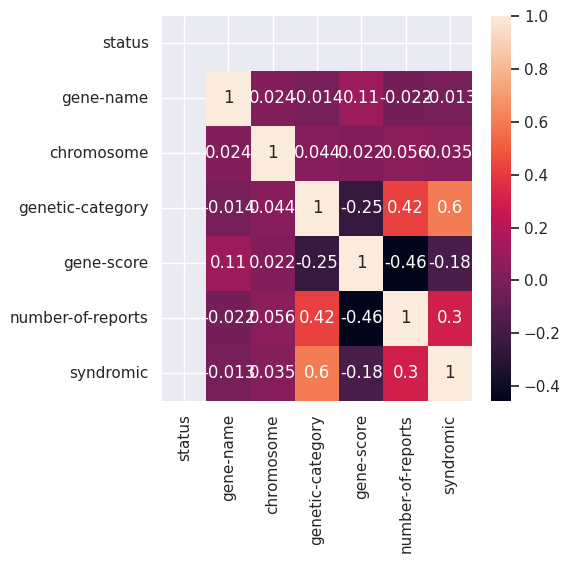

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1['syndromic'].value_counts()

0    790
1    230
Name: syndromic, dtype: int64

<Axes: >

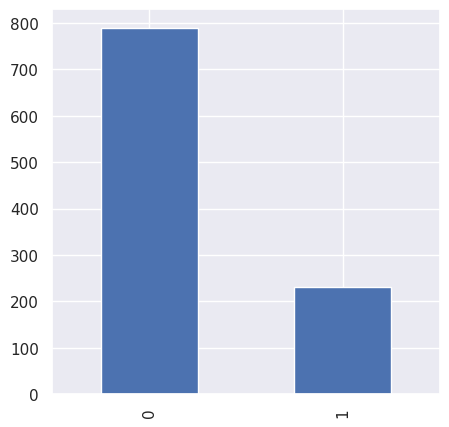

In [ ]:
df1['syndromic'].value_counts().plot.bar()

In [ ]:
#Choosing dependent variable
x=df1.iloc[:,:-1]

#Choosing target variable
y=df1.iloc[:,-1]

In [ ]:
y.describe()

count    1020.00000
mean        0.22549
std         0.41811
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: syndromic, dtype: float64

## **ENCODING CATEGORICAL VARIABLES**

In [ ]:
#Transforming categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['gene-name', 'chromosome', 'genetic-category']
for col in cat_col:
    df1[col] = le.fit_transform(df1[col])
print(df1)

      status  gene-name  chromosome  genetic-category  gene-score  \
0          9          0           7                 5         3.0   
1          9         14           8                 3         3.0   
2          9         13          19                 4         3.0   
3          9         15          10                 3         3.0   
4          9        461           8                 5         3.0   
...      ...        ...         ...               ...         ...   
1018       9       1012           4                 7         2.0   
1019       9       1013          12                 3         1.0   
1020       9        436          16                 1         3.0   
1021       9       1014          17                13         3.0   
1022       9       1019           6                 3         3.0   

      number-of-reports  syndromic  
0                     5          0  
1                     1          0  
2                     6          0  
3                     4

<ipython-input-70-63c4c2abaa78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
<ipython-input-70-63c4c2abaa78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
<ipython-input-70-63c4c2abaa78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

# **SPLITTING TRAIN AND TEST SETS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# **HANDLING IMBALANCED DATASETS**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# **KFOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING ALGORITHMS**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB

In [ ]:
cv=KFold(n_splits=5, random_state=0, shuffle=True)

lrModel = LogisticRegression()
KnModel = KNeighborsClassifier()
RfModel = RandomForestClassifier()
DtModel = DecisionTreeClassifier()
SvmModel = SVC()
XgbModel = xgb.XGBClassifier()
BcModel = BaggingClassifier()
AdbModel = AdaBoostClassifier()
IfModel = IsolationForest()
NBModel = GaussianNB()

In [ ]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(AdbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(XgbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("XGBoost Average CV Score: ",scores.mean())

scores = cross_val_score(BcModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Bagging Classifier Average CV Score: ",scores.mean())

scores = cross_val_score(IfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Isolation Forest Average CV Score: ",scores.mean())

scores = cross_val_score(NBModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Naive Bayes Average CV Score: ", scores.mean())

Logistics Regression Average CV Score:  0.8797446514837819
KNeighbors Average CV Score:  0.7571208984252463
Decision Tree Average CV Score:  0.8844971453667106
Random Forest Average CV Score:  0.9129681912290609
AdaBoost Tree Average CV Score:  0.8955643390425998
Support Vector Machine Average CV Score:  0.5110860154338415
XGBoost Average CV Score:  0.9074314574314574
Bagging Classifier Average CV Score:  0.8987389422172031
Isolation Forest Average CV Score:  0.32040592257983563
Naive Bayes Average CV Score:  0.8544074283204717


# **FEATURE SELECTION USING T-TEST**

In [ ]:
import scipy.stats as stats
t_values, p_values = stats.ttest_ind(x, y)
results = pd.DataFrame({'feature': data.columns[:-1], 't-value': t_values, 'p-value': p_values})
results = results.sort_values(by='t-value', ascending=False)
k = 5
selected_features = results.head(k)['feature'].tolist()
selected_features

<ipython-input-76-ac862e289a12>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_values, p_values = stats.ttest_ind(x, y)


['status', 'gene-score', 'genetic-category', 'gene-name', 'chromosome']

# **KFOLD CROSS VALIDATION AFTER T-TEST**

In [ ]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(AdbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(XgbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("XGBoost Average CV Score: ",scores.mean())

scores = cross_val_score(BcModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Bagging Classifier Average CV Score: ",scores.mean())

scores = cross_val_score(IfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Isolation Forest Average CV Score: ",scores.mean())

scores = cross_val_score(NBModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Naive Bayes Average CV Score: ", scores.mean())

Logistics Regression Average CV Score:  0.8797446514837819
KNeighbors Average CV Score:  0.7571208984252463
Decision Tree Average CV Score:  0.8892465022899806
Random Forest Average CV Score:  0.9121714034757513
AdaBoost Tree Average CV Score:  0.8955643390425998
Support Vector Machine Average CV Score:  0.5110860154338415
XGBoost Average CV Score:  0.9074314574314574
Bagging Classifier Average CV Score:  0.8963674007152267
Isolation Forest Average CV Score:  0.3219869502478198
Naive Bayes Average CV Score:  0.8544074283204717


# **FEATURE SELECTION USING ANOVA TEST**

In [ ]:
# SelectKBest -- Select features according to the k highest scores.
# f_classif -- Compute the ANOVA F-value for the provided sample.
#F- Value - It is the ratio of two Chi-distributions divided by its degrees of Freedom
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=5)
z = select.fit_transform(x,y)
 
print("After selecting best 5 features:", z.shape) 

After selecting best 5 features: (1020, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
New_features=select.get_feature_names_out()
list(New_features)

['gene-name',
 'chromosome',
 'genetic-category',
 'gene-score',
 'number-of-reports']

# **KFOLD CROSS VALIDATION AFTER ANOVA TEST**

In [ ]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(AdbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(XgbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("XGBoost Average CV Score: ",scores.mean())

scores = cross_val_score(BcModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Bagging Classifier Average CV Score: ",scores.mean())

scores = cross_val_score(IfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Isolation Forest Average CV Score: ",scores.mean())

scores = cross_val_score(NBModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Naive Bayes Average CV Score: ", scores.mean())

Logistics Regression Average CV Score:  0.8797446514837819
KNeighbors Average CV Score:  0.7571208984252463
Decision Tree Average CV Score:  0.8852907961603614
Random Forest Average CV Score:  0.9121745404354101
AdaBoost Tree Average CV Score:  0.8955643390425998
Support Vector Machine Average CV Score:  0.5110860154338415
XGBoost Average CV Score:  0.9074314574314574
Bagging Classifier Average CV Score:  0.9011010728402032
Isolation Forest Average CV Score:  0.3196154087458435
Naive Bayes Average CV Score:  0.8544074283204717


# **COMPARISON OF VARIOUS MACHINE LEARNING ALGORITHMS**

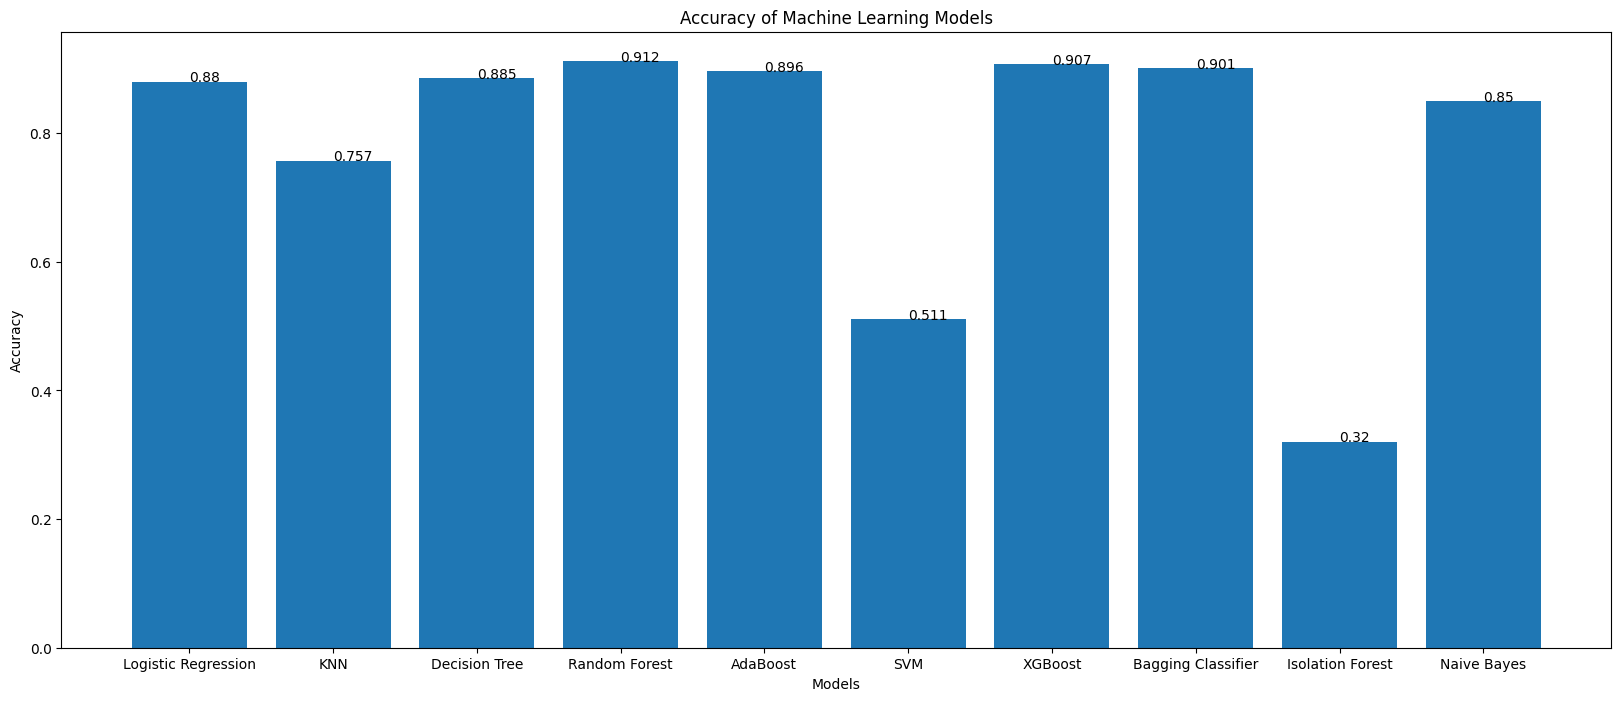

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVM', 'XGBoost', 'Bagging Classifier', 'Isolation Forest', 'Naive Bayes']
accuracy = [0.88, 0.757, 0.885, 0.912, 0.896, 0.511, 0.907, 0.901, 0.32, 0.85]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(20, 8)  # Adjust the width and height as desired

for index, value in enumerate(accuracy):
    plt.text(index, value,
             str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

# **Random Forest Classifier is the top performer**

# **HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'max_features': [None, 'sqrt', 'log2'], 'criterion': ['entropy', 'gini', 'log_loss']}

grid_search = GridSearchCV(estimator=RfModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x,y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
Best Score:  0.873529411764706


# **RANDOM FOREST CLASSIFIER**

*Random Forest Classifier is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. 

*It builds decision trees on different samples and takes their majority vote for classification.

*One of the most important features of the Random Forest Classifier is that it can handle the data set containing categorical variables in the case of classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, max_features='log2')
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

## **EVALUATION METRICS**

In [ ]:
# Accuracy is the fraction of predictions our model got right. 
# Accuracy = Number of correct predictions / Total number of predictions.

from sklearn.metrics import accuracy_score
print('The accuracy of random forest classifier: ', accuracy_score(y_test,y_pred_rfc))

The accuracy of random forest classifier:  0.8431372549019608


In [ ]:
# A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.

from sklearn.metrics import confusion_matrix
print('The confusion matrix of random forest classifier: ', confusion_matrix(y_test,y_pred_rfc))

The confusion matrix of random forest classifier:  [[130  28]
 [  4  42]]


In [ ]:
#Classification Report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       158
           1       0.60      0.91      0.72        46

    accuracy                           0.84       204
   macro avg       0.79      0.87      0.81       204
weighted avg       0.89      0.84      0.85       204



In [ ]:
#To identify the most influential feature used for detection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfc = RandomForestClassifier()
rfe_rf = RFE(estimator=rfc, n_features_to_select=1)

# Fit the RFE instance on the data to obtain the most important feature
rfe_rf.fit(x, y)

# Print the ranking of each feature based on its importance
print("Feature ranking:", rfe_rf.ranking_)

# Print the name of the most important feature
print("Most important feature:", x.columns[rfe_rf.ranking_.argmin()])

Feature ranking: [6 2 4 1 5 3]
Most important feature: genetic-category
